<h1 style='background:#00091c; border:0;'><center style='color:#00cdff'>Feature Engineering</center></h1> 

Como os dados não possuem rótulos, vamos tentar explorar eles melhor e tentar extrair recursos dentro do texto que possam ajudar a classificar os dados.

Algumas perguntas que tentarei responder nesse notebook são: 

1. **Existe em alguma parte do texto dos laudos que é dado o diagnóstico?**
2. **Existe alguma padronização para exames que não apresentam nada anormal?**
3. **É possível rotular os dados com as informações apresentadas nos laudos?**

In [63]:
import pandas as pd
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from wordcloud import WordCloud, STOPWORDS
from pprint import pprint
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import plot_roc_curve

In [2]:
stopwords = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']

In [3]:
df = pd.read_csv('sample_laudos.csv')

In [4]:
df.head()

,docid,modalidade,tipo_exame,laudo_completo
0,189988,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
1,376443,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizados cortes tomográficos axiais com técn...
2,1843933,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tecnica: \n o estudo tomográfico computadoriza...
3,454421,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
4,61595,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizada tomografia computadorizada do tórax ...


In [5]:
def cleaning_text(text):
    text = re.sub('\s+', ' ', text)  # remove newline chars
    text = re.sub("\'", '', text)  # remove single quotes
    text = re.sub('\*', '', text)
    text = text.replace('.', '')
    text = text.strip()
    
    return text

In [6]:
df['laudo_completo'] = df['laudo_completo'].apply(cleaning_text)
df

,docid,modalidade,tipo_exame,laudo_completo
0,189988,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
1,376443,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizados cortes tomográficos axiais com técn...
2,1843933,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tecnica: o estudo tomográfico computadorizado ...
3,454421,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
4,61595,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizada tomografia computadorizada do tórax ...
...,...,...,...,...
4995,948854,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tc do tórax técnica: obtidas imagens axiais se...
4996,1668375,CR,RADIOGRAFIA DO TÓRAX,partes moles sem particularidades sinais de es...
4997,527535,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
4998,131674,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,infiltrado intersticio-alveolar com broncogram...


 ### **<span style="color:##00cdff;">1. DIAGNÓSTICOS NO TEXTO</span>**
 
 Durante a exploração dos dados, identifiquei que alguns laudos possuem um campo chamado **opinião diagnóstica** onde é descrito o possível disgnóstico daquela tomografia/radiografia.

In [7]:
diagnosticos = df[df['laudo_completo'].str \
                  .contains("opinião diagnóstica|opiniao diagnostica|impressão diagnóstica|hipóteses diagnósticas|diagnósticos diferenciais|possibilidades diagnósticas|sugere o diagnóstico de")]
diagnosticos

,docid,modalidade,tipo_exame,laudo_completo
9,375232,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
10,547307,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,estudo tomográfico computadorizado do tórax re...
14,250960,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
20,575883,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
24,67179,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
...,...,...,...,...
4986,556440,CR,RADIOGRAFIA DO TÓRAX,transparência normal do parênquima pulmonar di...
4991,1011332,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
4993,184280,CR,RADIOGRAFIA DO TÓRAX,transparência normal do parênquima pulmonar di...
4997,527535,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...


**1140** laudos possuem esse **campo** no seu texto. Vamos verificar quais são os diagnósticos dados. Usando regex vamos pegar o texto que aparece depois desse padrão.

In [8]:
diagnostic_text = []
try:
    for d in diagnosticos['laudo_completo'].values:
        text_d = re.search("(opinião diagnóstica:?|opiniao diagnostica:?|impressão diagnóstica:?|hipóteses diagnósticas|diagnósticos diferenciais|possibilidades diagnósticas|sugere o diagnóstico de)(.*)", d).group(2)
        diagnostic_text.append(text_d.strip())
except:
    pass

In [9]:
diagnosticos['diagnosticos'] = diagnostic_text

C:\Users\Taynara\AppData\Local\Temp/ipykernel_11172/88283550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosticos['diagnosticos'] = diagnostic_text


In [10]:
diagnosticos

,docid,modalidade,tipo_exame,laudo_completo,diagnosticos
9,375232,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,alterações crônicas de processo granulomatoso ...
10,547307,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,estudo tomográfico computadorizado do tórax re...,na dependência da correlação com o contexto cl...
14,250960,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,processo expansivo tireoidiano com componente ...
20,575883,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,opacidades parenquimatosas irregulares e bolha...
24,67179,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,sinais compatíveis com pneumopatia intersticial
...,...,...,...,...,...
4986,556440,CR,RADIOGRAFIA DO TÓRAX,transparência normal do parênquima pulmonar di...,aspecto radiológico normal do tórax
4991,1011332,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,estrias densas fibroatelectásicas no lobo infe...
4993,184280,CR,RADIOGRAFIA DO TÓRAX,transparência normal do parênquima pulmonar di...,aspecto radiológico normal do tórax
4997,527535,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,estudo tomográfico do tórax dentro dos padrões...


### Frases de diagnósticos **normais**: 
* ausência de lesões traumáticas do parênquima pulmonar ao presente método de estudo
* estudo radiográfico do tórax sem alterações significativas
* aspecto radiológico normal do tórax
* estudo tomográfico do tórax dentro dos padrões da normalidade
* ausência de lesões traumáticas

### Frases de diagnósticos que indicam alguma **patologia**:

* ausência de lesões traumáticas do parênquima pulmonar ao presente método de estudo
* pneumopatia inflamatória lesões fibroatelectásicas no ápice do pulmão esquerdo
* tromboembolismo pulmonar agudo bilateral

Alguns laudos podem apresentar **mais de uma** patologia como diagnóstico.

**Conclusão**: É mais fácil rotular laudos normais, porque apresentam um padrão de texto mais normalizado

In [11]:
normal = ["ausência de lesões traumáticas do parênquima pulmonar", "estudo radiográfico do tórax sem alterações significativas",
                "aspecto radiológico normal do tórax", "estudo tomográfico do tórax dentro dos padrões da normalidade", "ausência de lesões traumáticas"]

In [12]:
def f(row):
    if any(rotulo in row['diagnosticos'] for rotulo in normal):
        return 'NORMAL'
    else:
        return 'PATOLOGIA'

In [13]:
diagnosticos['label'] = diagnosticos.apply(f, axis=1)

C:\Users\Taynara\AppData\Local\Temp/ipykernel_11172/1884974096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosticos['label'] = diagnosticos.apply(f, axis=1)


In [14]:
diagnosticos

,docid,modalidade,tipo_exame,laudo_completo,diagnosticos,label
9,375232,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,alterações crônicas de processo granulomatoso ...,PATOLOGIA
10,547307,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,estudo tomográfico computadorizado do tórax re...,na dependência da correlação com o contexto cl...,PATOLOGIA
14,250960,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,processo expansivo tireoidiano com componente ...,PATOLOGIA
20,575883,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,opacidades parenquimatosas irregulares e bolha...,PATOLOGIA
24,67179,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,sinais compatíveis com pneumopatia intersticial,PATOLOGIA
...,...,...,...,...,...,...
4986,556440,CR,RADIOGRAFIA DO TÓRAX,transparência normal do parênquima pulmonar di...,aspecto radiológico normal do tórax,NORMAL
4991,1011332,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,estrias densas fibroatelectásicas no lobo infe...,PATOLOGIA
4993,184280,CR,RADIOGRAFIA DO TÓRAX,transparência normal do parênquima pulmonar di...,aspecto radiológico normal do tórax,NORMAL
4997,527535,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,estudo tomográfico do tórax dentro dos padrões...,NORMAL


In [16]:
diagnosticos['label'].value_counts()

NORMAL       638
PATOLOGIA    502
Name: label, dtype: int64

In [17]:
diagnosticos.reset_index(drop=True)
diagnosticos

,docid,modalidade,tipo_exame,laudo_completo,diagnosticos,label
9,375232,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,alterações crônicas de processo granulomatoso ...,PATOLOGIA
10,547307,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,estudo tomográfico computadorizado do tórax re...,na dependência da correlação com o contexto cl...,PATOLOGIA
14,250960,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,processo expansivo tireoidiano com componente ...,PATOLOGIA
20,575883,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,opacidades parenquimatosas irregulares e bolha...,PATOLOGIA
24,67179,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,sinais compatíveis com pneumopatia intersticial,PATOLOGIA
...,...,...,...,...,...,...
4986,556440,CR,RADIOGRAFIA DO TÓRAX,transparência normal do parênquima pulmonar di...,aspecto radiológico normal do tórax,NORMAL
4991,1011332,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,estrias densas fibroatelectásicas no lobo infe...,PATOLOGIA
4993,184280,CR,RADIOGRAFIA DO TÓRAX,transparência normal do parênquima pulmonar di...,aspecto radiológico normal do tórax,NORMAL
4997,527535,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,estudo tomográfico do tórax dentro dos padrões...,NORMAL


 ### **<span style="color:##00cdff;">2. MODELOS</span>**
 Um novo dataset foi montado, duas colunas novas foram adicionadas graças a extração de informações do texto. Elas são:
 * **diagnosticos**: Texto do diagnóstico do laudo
 * **label**: Rótulos montados a partir dos diagnósticos, sendo eles:
     * NORMAL: O exame não apresentou nenhuma anormalidade
     * PATOLOGIA: O diagnóstico apresentou alguma alteração no exame, podendo ser alguma patologia.

In [75]:
X = diagnosticos['laudo_completo'].values
y = diagnosticos['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

### **<span style="color:##00cdff;">Naive Bayes</span>**

In [76]:
nb_text_clf = Pipeline([
     ('vect', CountVectorizer(stop_words=stopwords)),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
])

In [77]:
nb_text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['de', 'a', 'o', 'que', 'e', 'do',
                                             'da', 'em', 'um', 'para', 'é',
                                             'com', 'não', 'uma', 'os', 'no',
                                             'se', 'na', 'por', 'mais', 'as',
                                             'dos', 'como', 'mas', 'foi', 'ao',
                                             'ele', 'das', 'tem', 'à', ...])),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [78]:
nb_predicted = nb_text_clf.predict(X_test)
print(metrics.classification_report(y_test, nb_predicted,
     target_names=['NORMAL', 'PATOLOGIA']))

              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.98       251
   PATOLOGIA       0.99      0.95      0.97       205

    accuracy                           0.97       456
   macro avg       0.98      0.97      0.97       456
weighted avg       0.97      0.97      0.97       456



### **<span style="color:##00cdff;">SGDClassifier</span>**

In [79]:
sgd_text_clf = Pipeline([
     ('vect', CountVectorizer(stop_words=stopwords)),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier()),
])

In [80]:
sgd_text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['de', 'a', 'o', 'que', 'e', 'do',
                                             'da', 'em', 'um', 'para', 'é',
                                             'com', 'não', 'uma', 'os', 'no',
                                             'se', 'na', 'por', 'mais', 'as',
                                             'dos', 'como', 'mas', 'foi', 'ao',
                                             'ele', 'das', 'tem', 'à', ...])),
                ('tfidf', TfidfTransformer()), ('clf', SGDClassifier())])

In [81]:
sgd_predicted = sgd_text_clf.predict(X_test)
print(metrics.classification_report(y_test, sgd_predicted,
     target_names=['NORMAL', 'PATOLOGIA']))

              precision    recall  f1-score   support

      NORMAL       0.99      1.00      0.99       251
   PATOLOGIA       1.00      0.99      0.99       205

    accuracy                           0.99       456
   macro avg       0.99      0.99      0.99       456
weighted avg       0.99      0.99      0.99       456



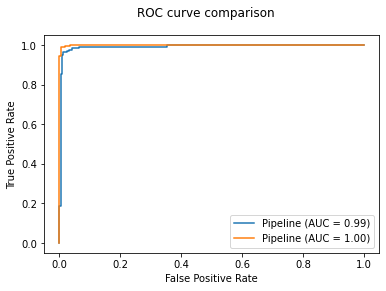

In [85]:
nb_disp = plot_roc_curve(nb_text_clf, X_test, y_test)
sgd_disp = plot_roc_curve(sgd_text_clf, X_test, y_test, ax=nb_disp.ax_)
sgd_disp.figure_.suptitle("ROC curve comparison")

plt.show()

Aplicando dois modelos temos resultados excelentes, mas é necessário investigar melhor caso esteja tenho overfitting ou se de fato o modelo consegue identificar de fato os laudos com diagnósticos normais ou de patologia. O novo dataset pode estar influênciando a performance dos modelos. Nos próximos passos vamos tentar predizer o resto do dado que não conseguimos rotular para verificar se o modelo consegue rotular eles de forma eficaz.

In [88]:
new_df = df[~df['docid'].isin(diagnosticos['docid'])]
new_df

,docid,modalidade,tipo_exame,laudo_completo
0,189988,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
1,376443,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizados cortes tomográficos axiais com técn...
2,1843933,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tecnica: o estudo tomográfico computadorizado ...
3,454421,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
4,61595,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizada tomografia computadorizada do tórax ...
...,...,...,...,...
4992,21895,CR,RADIOGRAFIA DO TÓRAX,partes moles sem particularidades estruturas ó...
4994,1319596,CR,RADIOGRAFIA DO TÓRAX,partes moles sem particularidades cúpulas diaf...
4995,948854,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tc do tórax técnica: obtidas imagens axiais se...
4996,1668375,CR,RADIOGRAFIA DO TÓRAX,partes moles sem particularidades sinais de es...


In [89]:
new_df.reset_index(drop=True)

,docid,modalidade,tipo_exame,laudo_completo
0,189988,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
1,376443,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizados cortes tomográficos axiais com técn...
2,1843933,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tecnica: o estudo tomográfico computadorizado ...
3,454421,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
4,61595,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizada tomografia computadorizada do tórax ...
...,...,...,...,...
3855,21895,CR,RADIOGRAFIA DO TÓRAX,partes moles sem particularidades estruturas ó...
3856,1319596,CR,RADIOGRAFIA DO TÓRAX,partes moles sem particularidades cúpulas diaf...
3857,948854,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tc do tórax técnica: obtidas imagens axiais se...
3858,1668375,CR,RADIOGRAFIA DO TÓRAX,partes moles sem particularidades sinais de es...


In [102]:
new_pred = nb_text_clf.predict(new_df['laudo_completo'].values)

In [103]:
new_pred_prob = nb_text_clf.predict_proba(new_df['laudo_completo'].values)

In [111]:
new_df['label'] = new_pred
new_df['label_prob'] = [max(prob) for prob in new_pred_prob]

C:\Users\Taynara\AppData\Local\Temp/ipykernel_11172/3427722499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['label'] = new_pred
C:\Users\Taynara\AppData\Local\Temp/ipykernel_11172/3427722499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['label_prob'] = [max(prob) for prob in new_pred_prob]


In [124]:
new_df.head(50)

,docid,modalidade,tipo_exame,laudo_completo,label,label_prob
0,189988,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,PATOLOGIA,0.978454
1,376443,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizados cortes tomográficos axiais com técn...,PATOLOGIA,0.989981
2,1843933,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tecnica: o estudo tomográfico computadorizado ...,PATOLOGIA,0.994119
3,454421,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,PATOLOGIA,0.984203
4,61595,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizada tomografia computadorizada do tórax ...,PATOLOGIA,0.999359
5,670634,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,PATOLOGIA,0.999077
6,563100,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,PATOLOGIA,0.946282
7,663773,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,exame laudado no sistema de telerradiologia té...,PATOLOGIA,0.996381
8,815751,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,aquisição com cortes axiais e reformatações mu...,PATOLOGIA,0.995798
11,58098,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,PATOLOGIA,0.648450


In [126]:
new_df[new_df['label'] == 'NORMAL']

,docid,modalidade,tipo_exame,laudo_completo,label,label_prob
36,1814078,CR,RADIOGRAFIA DO TÓRAX,opacidades no hemitórax direito e terço médio ...,NORMAL,0.906796
38,1277184,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tecnica: o estudo tomográfico computadorizado ...,NORMAL,0.519853
63,1487965,CR,RADIOGRAFIA DO TÓRAX,partes moles sem particularidades estruturas ó...,NORMAL,0.991601
89,217053,CR,RADIOGRAFIA DO TÓRAX,estudo comparativo em relação ao do dia 22 11 ...,NORMAL,0.878274
154,1334860,CR,RADIOGRAFIA DO TÓRAX,finas opacidades pleuro-pulmonares basais bila...,NORMAL,0.808183
...,...,...,...,...,...,...
4975,1252514,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tecnica: o estudo tomográfico computadorizado ...,NORMAL,0.836109
4985,999257,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,NORMAL,0.923760
4990,42127,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...,NORMAL,0.846879
4992,21895,CR,RADIOGRAFIA DO TÓRAX,partes moles sem particularidades estruturas ó...,NORMAL,0.999963


In [115]:
new_df['label_prob'].mean()

0.9251334200046255

In [130]:
new_df['laudo_completo'][4975]

'tecnica: o estudo tomográfico computadorizado do tórax realizado com cortes axiais antes e após a injeção ev de contraste mostra: parênquima pulmonar com coeficientes de atenuação conservados ausência de derrames pleurais vias aéreas de calibre e aspecto preservados traquéia e brônquios-fonte de calibre normal mediastino centrado sem evidências de massas ou adenomegalias área cardíaca de dimensões habituais aorta torácica de calibre mantido estruturas hilares normoconfiguradas tronco da artéria pulmonar e ramos principais direito e esquerdo pérvios de calibre mantido'